In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from scrapper import HistoryScrapper, ResultatScrapper, Scrapper, ToPredictScrapper
from predicter import Predicter

<class 'pandas.core.frame.DataFrame'> (385612, 19)


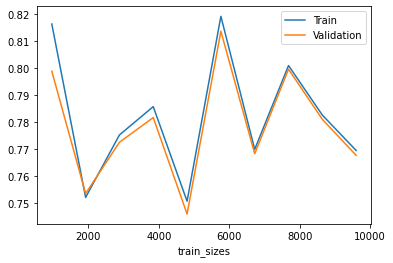

In [6]:
predicter=Predicter(use_threading=False,test=True,train_size=15000,test_size=0.2)
values=predicter.start(training_files= {'trot attele':'trot_attele'}, learning_curve=True)
N,train_score,val_score=values['trot attele'][0][0],values['trot attele'][0][1],values['trot attele'][0][2]
plt.plot(N,train_score.mean(axis=1),label="Train")
plt.plot(N,val_score.mean(axis=1),label="Validation")
plt.xlabel('train_sizes')
plt.legend()